In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xlrd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score, r2_score,classification_report, f1_score

In [2]:
#import danych
loc = ("default-of-credit-card-clients.xls")
data = pd.read_excel(loc)
data.drop(['ID'], axis = 1, inplace=True)

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY_AMT1/BILL_AMT1,PAY_AMT2/BILL_AMT2,PAY_AMT3/BILL_AMT3,PAY_AMT4/BILL_AMT4,PAY_AMT5/BILL_AMT5,PAY_AMT6/BILL_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,0.000000,0.222115,0.000000,0.000000,0.000000,0.000000
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
3,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
4,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492


In [4]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY_AMT1/BILL_AMT1,PAY_AMT2/BILL_AMT2,PAY_AMT3/BILL_AMT3,PAY_AMT4/BILL_AMT4,PAY_AMT5/BILL_AMT5,PAY_AMT6/BILL_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4826.076867,4799.387633,5215.502567,0.221200,-2.227149,-1.696790,-6.206102,-1.422020,-0.740808,-0.600207
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,15666.159744,15278.305679,17777.465775,0.415062,231.118244,104.467059,602.025950,145.550929,65.828204,80.582297
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-35436.000000,-10259.500000,-82150.000000,-17266.666667,-7483.947368,-11349.571429
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,296.000000,252.500000,117.750000,0.000000,0.031651,0.026475,0.012133,0.000050,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1500.000000,0.000000,0.052650,0.050886,0.041714,0.037945,0.040033,0.039526
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4013.250000,4031.500000,4000.000000,0.000000,0.215239,0.199030,0.153227,0.124014,0.139951,0.146458
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,621000.000000,426529.000000,528666.000000,1.000000,11453.666667,4444.333333,6333.333333,8891.357143,1738.424242,2643.330000


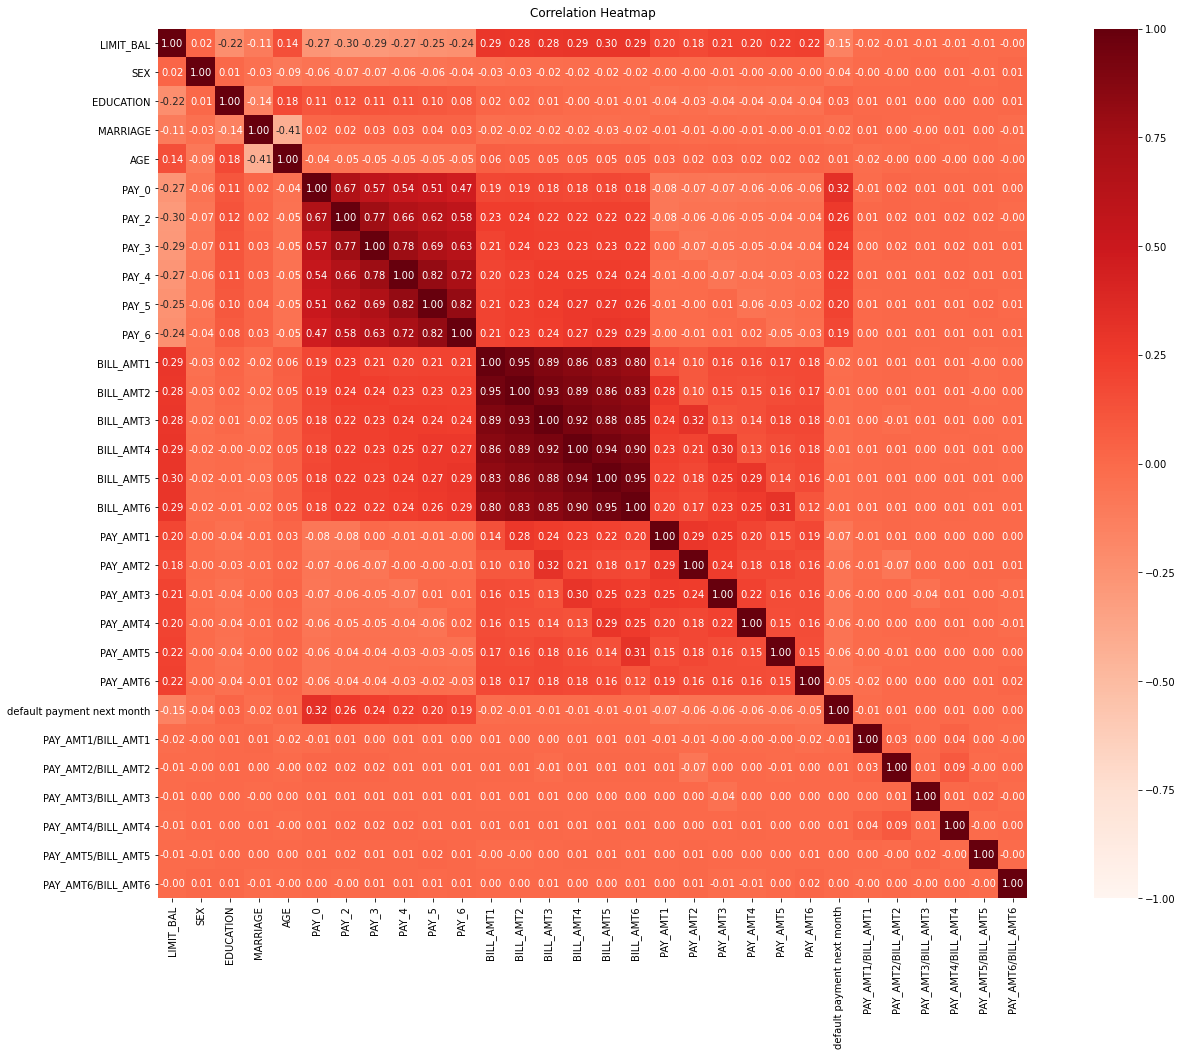

In [5]:
#Macierz korelacji
plt.figure(figsize=(24, 16))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1,fmt='.2f',center=0,square=True, annot=True, cmap='Reds')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [6]:
Y=data['default payment next month']
data.drop(['default payment next month'], axis = 1, inplace=True)
X=data

In [7]:
# Standaryzacja
standscaler = StandardScaler()
standscaler_data = standscaler.fit_transform(X)
st_data = pd.DataFrame(standscaler_data, columns = X.columns)
X=st_data
X.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AMT1/BILL_AMT1,PAY_AMT2/BILL_AMT2,PAY_AMT3/BILL_AMT3,PAY_AMT4/BILL_AMT4,PAY_AMT5/BILL_AMT5,PAY_AMT6/BILL_AMT6
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.296801,-0.308063,-0.314136,-0.293382,0.009637,0.018369,0.010309,0.009770,0.011254,0.007448
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.240005,-0.244230,-0.314136,-0.180878,0.009637,0.021792,0.010928,0.011870,0.011254,0.015060
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.240005,-0.244230,-0.248683,-0.012122,0.009861,0.017266,0.010431,0.010249,0.012270,0.011439
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.228645,-0.237846,-0.244166,-0.237130,0.009821,0.016643,0.010349,0.010037,0.011815,0.007869
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,0.271165,0.266434,-0.269039,-0.255187,0.010641,0.078170,0.010772,0.012723,0.011801,0.007889


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [9]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AMT1/BILL_AMT1,PAY_AMT2/BILL_AMT2,PAY_AMT3/BILL_AMT3,PAY_AMT4/BILL_AMT4,PAY_AMT5/BILL_AMT5,PAY_AMT6/BILL_AMT6
2758,0.250611,0.810161,-1.079457,0.858557,-1.354506,-1.764843,-1.558876,-1.532192,-1.521944,-1.530046,...,-0.269085,-0.308063,-0.188793,-0.287757,0.017421,0.021563,0.011970,0.009770,0.011254,0.008097
11337,-0.365981,-1.234323,-1.079457,0.858557,0.272789,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.211606,0.585598,-0.052323,-0.133064,0.009767,0.016677,0.010434,0.020277,0.015547,0.016595
23149,0.867203,0.810161,0.185828,0.858557,0.164303,-0.874991,-0.723570,-0.696663,-0.666599,-0.647565,...,-0.190251,-0.188312,-0.191738,0.284156,0.015901,0.022855,0.011970,0.016641,0.026397,0.075583
19039,-1.059646,0.810161,-1.079457,0.858557,-1.029047,0.904712,1.782348,1.809921,1.899436,0.234917,...,-0.296801,-0.272061,-0.242137,-0.237130,0.010260,0.017052,0.010309,0.010019,0.012304,0.008189
10802,2.177460,0.810161,-1.079457,0.858557,-0.595102,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.183208,-0.244230,-0.183229,-0.256987,0.009786,0.016630,0.010416,0.010003,0.012266,0.007848


In [10]:
X_train.corr().to_excel('korelacja.xlsx')

In [11]:
Y_test.value_counts()

0    9357
1    2643
Name: default payment next month, dtype: int64

In [12]:
def return_roc_figure(y_value, prediction_proba):
    fpr, tpr, _ = roc_curve(y_value, prediction_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label=f'Wykres krzywej ROC', color='blue')
    plt.plot([0, 1], [0, 1], 'r--', label='Wykres prostej losowej')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Krzywa ROC')
    plt.legend(loc='lower right')
    plt.show()
    
def write_metric(y_true, pred, prob):
    print('Accuracy:', accuracy_score(y_true, pred))
    print(classification_report(y_true, pred))
    auc = roc_auc_score(y_true, prob[:,1])
    print('AUC:', auc)
    print('F1 score: ', f1_score(y_true, pred))
    print(confusion_matrix(y_true, pred)) 

Accuracy: 0.81375
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9357
           1       0.64      0.35      0.45      2643

    accuracy                           0.81     12000
   macro avg       0.74      0.65      0.67     12000
weighted avg       0.79      0.81      0.79     12000

AUC: 0.7581707338425254
F1 score:  0.4507249938559843
[[8848  509]
 [1726  917]]


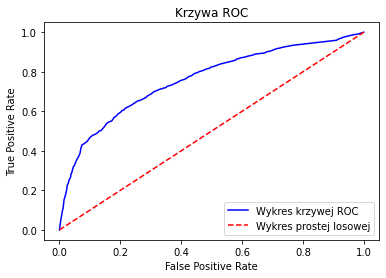

In [13]:
# Drzewo decyzyjne
dtc = DecisionTreeClassifier(criterion="gini", max_depth=12, min_samples_split=120, min_samples_leaf=80)
dtc.fit(X_train, Y_train)
dtc_predict = dtc.predict(X_test)

prob = dtc.predict_proba(X_test)
write_metric(Y_test, dtc_predict, prob)
return_roc_figure(Y_test, prob)

Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9357
           1       0.65      0.34      0.45      2643

    accuracy                           0.81     12000
   macro avg       0.74      0.65      0.67     12000
weighted avg       0.80      0.81      0.79     12000

AUC: 0.7710540901413803
F1 score:  0.4499504459861248
[[8872  485]
 [1735  908]]


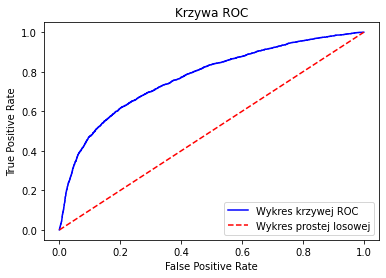

In [14]:
#  Sieć neuronowa
mlpc=MLPClassifier(hidden_layer_sizes=10, random_state=1)
mlpc.fit(X_train, Y_train)
mlpc_predict = mlpc.predict(X_test)

prob = mlpc.predict_proba(X_test)
write_metric(Y_test, mlpc_predict, prob)
return_roc_figure(Y_test, prob)

Accuracy: 0.8201666666666667
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9357
           1       0.67      0.36      0.47      2643

    accuracy                           0.82     12000
   macro avg       0.75      0.66      0.68     12000
weighted avg       0.80      0.82      0.80     12000

AUC: 0.7797179892999553
F1 score:  0.4713375796178344
[[8880  477]
 [1681  962]]


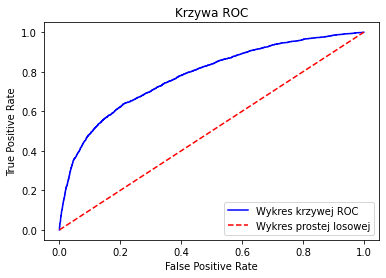

In [15]:
# Las losowy
clf = RandomForestClassifier(n_estimators=100, random_state=1,criterion="gini",bootstrap=True, max_depth=10)
clf.fit(X_train, Y_train)
clf_predict = clf.predict(X_test)

prob = clf.predict_proba(X_test)
write_metric(Y_test, clf_predict, prob)
return_roc_figure(Y_test, prob)

Accuracy: 0.8131666666666667
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      9357
           1       0.63      0.36      0.46      2643

    accuracy                           0.81     12000
   macro avg       0.74      0.65      0.67     12000
weighted avg       0.79      0.81      0.79     12000

AUC: 0.7721896087151476
F1 score:  0.45714285714285713
[[8814  543]
 [1699  944]]


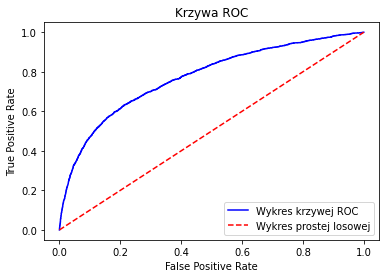

In [16]:
# XGBboost
xgb = XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, n_estimators = 100,use_label_encoder=False,random_state=1,eval_metric='mlogloss')
xgb.fit(X_train,Y_train)
xgb_predict = xgb.predict(X_test)

prob = xgb.predict_proba(X_test)
write_metric(Y_test, xgb_predict, prob)
return_roc_figure(Y_test, prob)